In [3]:
from typing import TypedDict #define the structure (shape) of a dictionary with specific keys and value types.
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv

In [4]:
load_dotenv()

True

In [5]:
class ParentState(TypedDict):

    question: str
    answer_eng: str
    answer_hin: str
    

In [6]:
parent_llm = ChatGoogleGenerativeAI(model='gemini-2.5-flash')
subgraph_llm = ChatGoogleGenerativeAI(model='gemini-2.5-flash')

In [7]:
def translate_text(state: ParentState):

    prompt = f"""
Translate the following text to Hindi.
Keep it natural and clear. Do not add extra content.

Text:
{state["answer_eng"]}
""".strip()
    
    translated_text = subgraph_llm.invoke(prompt).content

    return {'answer_hin': translated_text}

In [8]:
subgraph_builder = StateGraph(ParentState)

subgraph_builder.add_node('translate_text', translate_text)

subgraph_builder.add_edge(START, 'translate_text')
subgraph_builder.add_edge('translate_text', END)

subgraph = subgraph_builder.compile()

In [9]:
def generate_answer(state: ParentState):

    answer = parent_llm.invoke(f"You are a helpful assistant. Answer clearly.\n\nQuestion: {state['question']}").content
    return {'answer_eng': answer}

In [10]:
parent_builder = StateGraph(ParentState)

parent_builder.add_node("answer", generate_answer)
parent_builder.add_node("translate", subgraph)

parent_builder.add_edge(START, 'answer')
parent_builder.add_edge('answer', 'translate')
parent_builder.add_edge('translate', END)

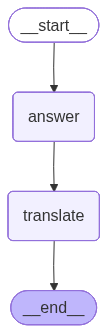

In [11]:
graph = parent_builder.compile()

graph

In [12]:

graph.invoke({'question': 'What is quantum physics'})

{'question': 'What is quantum physics',
 'answer_eng': 'Quantum physics, also known as quantum mechanics, is a fundamental branch of physics that studies the behavior of matter and energy at the most microscopic, subatomic levels — things like atoms, electrons, photons, and other elementary particles.\n\nIt\'s the "rulebook" for the universe when you zoom in really, really close, revealing a reality that is profoundly different from our everyday experience and the "classical" physics of Isaac Newton.\n\nHere\'s a breakdown of what it is and its key ideas:\n\n### What Quantum Physics Is\n\n1.  **The Physics of the Very Small:** While classical physics (like Newton\'s laws of motion) works perfectly for objects we can see and interact with (planets, cars, apples), it completely breaks down when you try to apply it to individual atoms and their components. Quantum physics provides the accurate description for this tiny, "quantum" realm.\n\n2.  **A Different Reality:** It describes a unive